In [1]:
import pandas as pd 
import os
import numpy as np
import pickle
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from tqdm import tqdm
import seaborn as sns
import string

In [2]:
libdir = '../data/lib'
libname = 'human.faims.fixed.decoy.pkl'

with open(os.path.join(libdir,libname),'rb')as f:
    library = pickle.load(f)
for key in tqdm(library.keys()):
    library[key]['Species'] = 'HUMAN'

100%|██████████| 261870/261870 [00:00<00:00, 1625056.06it/s]


In [3]:
dirname = "../result/"
filenames = []
mzML_names = []
for i in range(1,101):
    filenames.append('CsoDIAq-file'+'%d'%i+'_20200719_MAGIC_MCF7_1128repro_'+'%02d'%i+'_correctedNoFilter_withFeature_1cycle_8_5_LDA_ID_Coeffs.csv')
    mzML_names.append('20200719_MAGIC_MCF7_1128repro_'+'%02d'%i+'.mzML')
    
filenames_A = filenames[:50]
filenames_B = filenames[50:]

In [4]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [5]:
total_A = pd.DataFrame([])
for i in range(len(filenames_A)):
    df = pd.read_csv(os.path.join(dirname,filenames_A[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['A'+str(i+1)] = df['Coeff']
    df = df[['Precursor','A'+str(i+1)]]
    if i==0:
        total_A = pd.concat([total_A,df])
    else:
        total_A = total_A.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [6]:
total_B = pd.DataFrame([])
for i in range(len(filenames_B)):
    df = pd.read_csv(os.path.join(dirname,filenames_B[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['B'+str(i+1)] = df['Coeff']
    df = df[['Precursor','B'+str(i+1)]]
    if i==0:
        total_B = pd.concat([total_B,df])
    else:
        total_B = total_B.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [7]:
total_A

,Precursor,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50
0.0,A+42.01057AAGGGGGGAAAAGR_2,10069.081578,12425.958875,NaN,10494.472897,11567.470981,NaN,12023.614811,NaN,NaN,...,NaN,NaN,NaN,9261.729491,NaN,NaN,8938.221684,8952.052226,10180.256715,NaN
1.0,A+42.01057AAAAAAAAAGAAGGR_2,18917.779561,18498.615942,12530.180816,23730.638859,21191.010013,10113.994815,21242.451555,23642.101434,19876.419100,...,27059.199155,19545.161082,23577.877291,24327.051001,23473.492270,21360.807291,21358.082341,19399.011527,22631.148538,24649.624618
2.0,A+42.01057EVQVLVLDGR_2,23339.976848,21254.912006,15864.512915,22972.361120,23429.611098,13426.398905,25512.245579,25683.818045,27465.566102,...,28247.950156,22409.175598,23558.070053,23277.044713,27108.132647,24497.065101,24420.103752,25867.349150,26919.856522,22615.313739
3.0,GQLESIVENIR_2,11588.927525,NaN,NaN,14511.211868,NaN,NaN,NaN,NaN,NaN,...,16274.959775,NaN,NaN,NaN,14149.831899,NaN,15783.294347,14028.968085,NaN,NaN
4.0,A+42.01057TTATMATSGSAR_2,25381.354925,26245.374290,NaN,27798.612066,29010.695477,NaN,27554.762083,29376.134341,25086.337027,...,29110.982990,23333.463135,27608.805998,25281.292688,24523.283123,25553.694004,26298.435421,28995.525690,NaN,27858.143180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,ASQNLVVLAR_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7468.475433
NaN,FNLTGLNEQVPHYR_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11007.252943
NaN,GSDHSASLEPGELAELVR_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.131743
NaN,LQVTNVLSQPLTQATVK_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8386.075133


In [8]:
total_A['num_of_nan'] = total_A.T.isna().sum()
total_A = total_A[total_A['num_of_nan']<=10]
total_B['num_of_nan'] = total_B.T.isna().sum()
total_B = total_B[total_B['num_of_nan']<=10]

In [9]:
def get_avg_A(x):
    coeffs = []
    for i in range(50):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_A(x):
    coeffs = []
    for i in range(50):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)
def get_avg_B(x):
    coeffs = []
    for i in range(50):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_B(x):
    coeffs = []
    for i in range(50):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)

In [10]:
total_A['peptide'] = total_A['Precursor'].apply(lambda x:x.split('_')[0])
total_A_pep = total_A.groupby('peptide').sum().reset_index()
total_A_pep = total_A_pep.drop('num_of_nan',axis=1)


total_B['peptide'] = total_B['Precursor'].apply(lambda x:x.split('_')[0])
total_B_pep = total_B.groupby('peptide').sum().reset_index()
total_B_pep = total_B_pep.drop('num_of_nan',axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_188080\602794923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_A['peptide'] = total_A['Precursor'].apply(lambda x:x.split('_')[0])


In [11]:
if len(total_A_pep['peptide'].values)!=len(set(total_A_pep['peptide'].values)):
    print('wrong')
if len(total_B_pep['peptide'].values)!=len(set(total_B_pep['peptide'].values)):
    print('wrong')
pep_A = total_A_pep['peptide'].values
pep_B = total_B_pep['peptide'].values

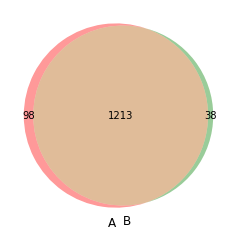

In [12]:
venn2([set(pep_A),set(pep_B)],['A','B'])
plt.show()

In [13]:
total_A

,Precursor,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A43,A44,A45,A46,A47,A48,A49,A50,num_of_nan,peptide
1.0,A+42.01057AAAAAAAAAGAAGGR_2,18917.779561,18498.615942,12530.180816,23730.638859,21191.010013,10113.994815,21242.451555,23642.101434,19876.419100,...,23577.877291,24327.051001,23473.492270,21360.807291,21358.082341,19399.011527,22631.148538,24649.624618,0,A+42.01057AAAAAAAAAGAAGGR
2.0,A+42.01057EVQVLVLDGR_2,23339.976848,21254.912006,15864.512915,22972.361120,23429.611098,13426.398905,25512.245579,25683.818045,27465.566102,...,23558.070053,23277.044713,27108.132647,24497.065101,24420.103752,25867.349150,26919.856522,22615.313739,0,A+42.01057EVQVLVLDGR
4.0,A+42.01057TTATMATSGSAR_2,25381.354925,26245.374290,NaN,27798.612066,29010.695477,NaN,27554.762083,29376.134341,25086.337027,...,27608.805998,25281.292688,24523.283123,25553.694004,26298.435421,28995.525690,NaN,27858.143180,8,A+42.01057TTATMATSGSAR
6.0,AFVDFLSDEIK_2,44105.944450,46254.439889,27150.155710,47570.271378,49736.753239,29174.025356,50243.231037,54088.901337,47267.978516,...,45989.710634,46019.098007,49629.098983,50962.856392,51378.968899,48505.853207,50843.645152,54878.263275,0,AFVDFLSDEIK
7.0,M+42.01057EEVVIAGMSGK_2,16553.790417,17928.449191,13129.217578,15573.579115,19130.496086,12454.600220,19789.812733,18836.723071,18383.835150,...,16117.685517,17166.027114,18070.402824,19551.086520,18640.933420,16100.917199,18030.118002,17773.666870,0,M+42.01057EEVVIAGMSGK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,IIGATDSSGELMFLMK_2,NaN,NaN,52471.633507,65244.128542,64510.959529,35822.087903,NaN,69270.313190,66606.026134,...,40232.673465,52113.902906,55876.885175,62719.835721,61620.481872,62361.148687,NaN,53920.437852,8,IIGATDSSGELMFLMK
NaN,LRPLYDIPYMFEAR_3,NaN,NaN,31185.170891,39094.383054,NaN,33669.182264,18748.460018,39630.843991,37187.742064,...,NaN,30885.150613,NaN,34557.304664,18467.071285,22468.492601,30923.486916,33002.917664,6,LRPLYDIPYMFEAR
NaN,RIGNLQTDLSDGLR_3,NaN,NaN,26948.567207,8839.442102,14923.626357,39416.590871,15504.039902,30102.690130,26310.044055,...,15658.634474,16259.474480,22733.199969,14658.910862,24140.601193,16425.517695,12636.828380,22780.624615,8,RIGNLQTDLSDGLR
NaN,NNRPSEGPLQTR_3,NaN,NaN,86828.448722,72941.939332,64614.944842,76065.560389,NaN,76550.879865,62129.536584,...,NaN,55835.568848,60396.670161,44374.286919,52751.292199,51326.230968,56056.752815,50388.242856,9,NNRPSEGPLQTR


In [14]:
intersection = set(pep_A) & set(pep_B)
inter_A = total_A_pep[total_A_pep['peptide'].isin(intersection)]
inter_B = total_B_pep[total_B_pep['peptide'].isin(intersection)]
total = inter_A.join(inter_B.set_index('peptide'),on='peptide',how='outer')
A_list = []
B_list = []
for i in range(1,51):
    A_list.append('A'+str(i))
    B_list.append('B'+str(i))
total['avg_A'] = total[A_list].apply(get_avg_A,axis=1)
total['avg_B'] = total[B_list].apply(get_avg_B,axis=1)
total['CV_A'] = total[A_list].apply(get_CV_A,axis=1)
total['CV_B'] = total[B_list].apply(get_CV_B,axis=1)
old_len = len(total)

In [15]:
def find_label(x):
    charges = [1,2,3,4,5,6,7]
    for charge in charges:
        key = (x,charge)
        if key in library.keys():
            return library[key]['Species']
        else:
            pass
    print('wrong')
    return -1

In [16]:
total['Species'] = total['peptide'].apply(find_label)

In [17]:
species_cnt1 = np.array([len(total[total['Species'] == 'HUMAN']),
                         len(total[total['Species'] == 'YEAS8']),
                         len(total[total['Species'] == 'ECOLI'])])

In [18]:
total = total[total['CV_A']<=0.2]
total = total[total['CV_B']<=0.2]

In [19]:
np.sum(species_cnt1)

1213

In [20]:
labels = ['HUMAN', 'YEAS8', 'ECOLI']
print('        before  after   得率')
print('整体', old_len, len(total), round(len(total) / old_len, 2), sep='\t')
species_cnt2 = np.array([len(total[total['Species'] == label]) for label in labels])


        before  after   得率
整体	1213	706	0.58


In [21]:
total['LogRatio'] = np.log2(list(np.divide(total['avg_A'], total['avg_B'])))
total['LogB'] = np.log2(list(total['avg_B']))

In [22]:
'''计算accuracy（median absolute deviation）'''
print('median absolute deviation')
for label in labels:
    temp = total[total['Species'] == label]
    if len(temp)==0:
        continue
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]
    parts = [np.array(part1['LogRatio']), np.array(part2['LogRatio']), np.array(part3['LogRatio'])]

    accuracy = []
    for part in parts:
        median = np.median(part)
        accuracy.append(np.round(np.median(np.abs(part - median)), 3))
    print(label, accuracy, 'mean: ' + str(np.mean(accuracy).round(3)), sep='\t')

median absolute deviation
HUMAN	[0.047, 0.06, 0.047]	mean: 0.051


(-5.0, 5.0)

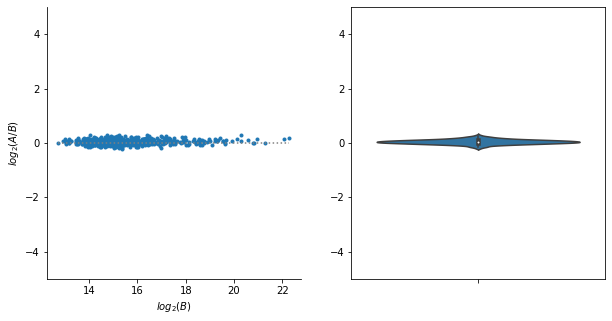

In [23]:
# sns.set_theme(style="dark")
labels = ['$Yeast$', '$Human$', '$E.coli$']
species = [ 'HUMAN']
ratios = [ 0]
# 去掉边框
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    ax[0].scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i])
    ax[0].hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

ax[0].set_xlabel("$log_2(B)$")
ax[0].set_ylabel("$log_2(A/B)$")
# plt.xlim((10,25))
ax[0].set_ylim((-5, 5))
#plt.legend(ncol=3, loc='upper center')  # 图例

temp = total[total['Species'] =='HUMAN']
ax[1] = sns.violinplot(y=temp['LogRatio'].values)
ax[1].set_ylim((-5,5))



In [24]:
temp_100 = total[total['Species'] =='HUMAN']

In [25]:
libdir = '../data/lib/'
libname = 'human.faims.fixed.download.sample.130941.RefEntrapment.psps23.RefDecoy.psps13.pkl'
with open(os.path.join(libdir,libname),'rb')as f:
    library = pickle.load(f)
for key in tqdm(library.keys()):
    library[key]['Species'] = 'HUMAN'

100%|██████████| 523764/523764 [00:00<00:00, 2285103.56it/s]


In [26]:
dirname = '../result/'
filenames_A = [
    'CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
]
filenames_B = [
    'CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
    'CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID_Coeffs.csv',
]

In [27]:
def get_avg_A(x):
    coeffs = []
    for i in range(6):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_A(x):
    coeffs = []
    for i in range(6):
        coeff = x['A'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)
def get_avg_B(x):
    coeffs = []
    for i in range(6):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)
def get_CV_B(x):
    coeffs = []
    for i in range(6):
        coeff = x['B'+str(i+1)]
        if coeff>0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)

In [28]:
total_A = pd.DataFrame([])
for i in range(len(filenames_A)):
    df = pd.read_csv(os.path.join(dirname,filenames_A[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['A'+str(i+1)] = df['Coeff']
    df = df[['Precursor','A'+str(i+1)]]
    if i==0:
        total_A = pd.concat([total_A,df])
    else:
        total_A = total_A.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [29]:
total_B = pd.DataFrame([])
for i in range(len(filenames_B)):
    df = pd.read_csv(os.path.join(dirname,filenames_B[i]))
    df['Precursor'] = df[['peptide','charge']].apply(lambda x:x['peptide']+'_'+str(x['charge']),axis=1)
    df['protein'] = df['peptide'].apply(peptide_type)
    df = df[df['protein']=='SAMPLE']
    df = df[df['Coeff']>0]
    df['B'+str(i+1)] = df['Coeff']
    df = df[['Precursor','B'+str(i+1)]]
    if i==0:
        total_B = pd.concat([total_B,df])
    else:
        total_B = total_B.join(df.set_index('Precursor'),on='Precursor',how='outer')

In [30]:
total_A['num_of_nan'] = total_A.T.isna().sum()
total_A = total_A[total_A['num_of_nan']<=1]
total_B['num_of_nan'] = total_B.T.isna().sum()
total_B = total_B[total_B['num_of_nan']<=1]

In [31]:
total_A['peptide'] = total_A['Precursor'].apply(lambda x:x.split('_')[0])
total_A_pep = total_A.groupby('peptide').sum().reset_index()
total_A_pep = total_A_pep.drop('num_of_nan',axis=1)
# total_A_pep['avg'] = total_A_pep[['A1','A2','A3','A4','A5']].apply(get_avg_A,axis=1)
# total_A_pep['Log2'] = np.log2(list(total_A_pep['avg']))


total_B['peptide'] = total_B['Precursor'].apply(lambda x:x.split('_')[0])
total_B_pep = total_B.groupby('peptide').sum().reset_index()
total_B_pep = total_B_pep.drop('num_of_nan',axis=1)
# total_B_pep['avg'] = total_B_pep[['B1','B2','B3','B4','B5']].apply(get_avg_B,axis=1)
# total_B_pep['Log2'] = np.log2(list(total_B_pep['avg']))

In [32]:
if len(total_A_pep['peptide'].values)!=len(set(total_A_pep['peptide'].values)):
    print('wrong')
if len(total_B_pep['peptide'].values)!=len(set(total_B_pep['peptide'].values)):
    print('wrong')
pep_A = total_A_pep['peptide'].values
pep_B = total_B_pep['peptide'].values

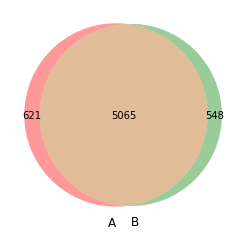

In [33]:
venn2([set(pep_A),set(pep_B)],['A','B'])
plt.show()

In [34]:
intersection = set(pep_A) & set(pep_B)
inter_A = total_A_pep[total_A_pep['peptide'].isin(intersection)]
inter_B = total_B_pep[total_B_pep['peptide'].isin(intersection)]
total = inter_A.join(inter_B.set_index('peptide'),on='peptide',how='outer')
total['avg_A'] = total[['A1','A2','A3','A4','A5','A6']].apply(get_avg_A,axis=1)
total['avg_B'] = total[['B1','B2','B3','B4','B5','B6']].apply(get_avg_B,axis=1)
total['CV_A'] = total[['A1','A2','A3','A4','A5','A6']].apply(get_CV_A,axis=1)
total['CV_B'] = total[['B1','B2','B3','B4','B5','B6']].apply(get_CV_B,axis=1)
old_len = len(total)

In [35]:
total['Species'] = total['peptide'].apply(find_label)

In [36]:
species_cnt1 = np.array([len(total[total['Species'] == 'HUMAN']),
                         len(total[total['Species'] == 'YEAS8']),
                         len(total[total['Species'] == 'ECOLI'])])

In [37]:
total = total[total['CV_A']<=0.2]
total = total[total['CV_B']<=0.2]

In [38]:
np.sum(species_cnt1)

5065

In [39]:
labels = ['HUMAN', 'YEAS8', 'ECOLI']
print('        before  after   得率')
print('整体', old_len, len(total), round(len(total) / old_len, 2), sep='\t')
species_cnt2 = np.array([len(total[total['Species'] == label]) for label in labels])
# print('HUMAN', species_cnt1[0], species_cnt2[0], (species_cnt2 / species_cnt1).round(2)[0], sep='\t')
# print('YEAST', species_cnt1[1], species_cnt2[1], (species_cnt2 / species_cnt1).round(2)[1], sep='\t')
# print('ECOLI', species_cnt1[2], species_cnt2[2], (species_cnt2 / species_cnt1).round(2)[2], sep='\t')

        before  after   得率
整体	5065	3341	0.66


In [40]:
total['LogRatio'] = np.log2(list(np.divide(total['avg_A'], total['avg_B'])))
total['LogB'] = np.log2(list(total['avg_B']))

In [41]:
'''计算accuracy（median absolute deviation）'''
print('median absolute deviation')
for label in labels:
    temp = total[total['Species'] == label]
    if len(temp)==0:
        continue
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]
    parts = [np.array(part1['LogRatio']), np.array(part2['LogRatio']), np.array(part3['LogRatio'])]

    accuracy = []
    for part in parts:
        median = np.median(part)
        accuracy.append(np.round(np.median(np.abs(part - median)), 3))
    print(label, accuracy, 'mean: ' + str(np.mean(accuracy).round(3)), sep='\t')

median absolute deviation
HUMAN	[0.071, 0.065, 0.053]	mean: 0.063


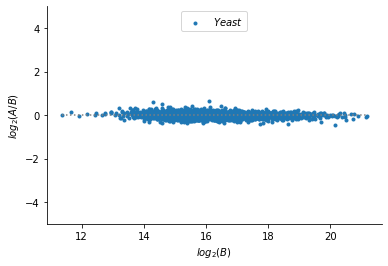

In [42]:
labels = ['$Yeast$', '$Human$', '$E.coli$']
species = ['HUMAN']
ratios = [0]
# 去掉边框
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    plt.scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i])
    plt.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

plt.xlabel("$log_2(B)$")
plt.ylabel("$log_2(A/B)$")
# plt.xlim((10,25))
plt.ylim((-5, 5))
plt.legend(ncol=3, loc='upper center')  # 图例
plt.show()
#plt.savefig('HYE124_ratio.png')

In [43]:
temp_12 = total[total['Species'] == 'HUMAN']

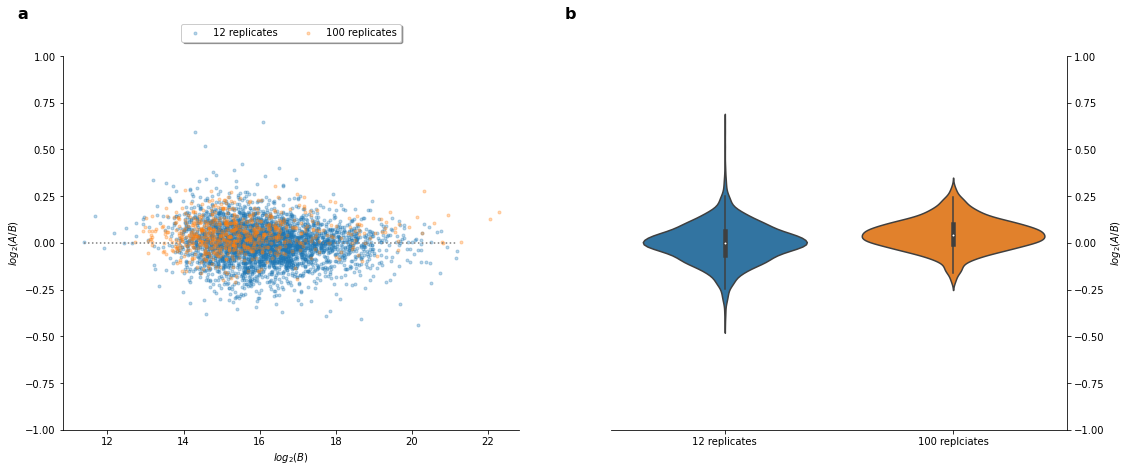

In [44]:
#sns.set_theme(style="whitegrid")
# 去掉边框
fig, ax = plt.subplots(1,2,figsize=(18,18*(1-0.618)))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].scatter(temp_12['LogB'], temp_12['LogRatio'], marker='.',label='12 replicates',alpha=0.3)
ax[0].scatter(temp_100['LogB'], temp_100['LogRatio'], marker='.',label='100 replicates',alpha=0.3)

ax[0].hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)    
ax[0].set_xlabel("$log_2(B)$")
ax[0].set_ylabel("$log_2(A/B)$")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True, ncol=2)
# plt.xlim((10,25))
ax[0].set_ylim((-1, 1))

# ax[0].set_title('a)', {'fontsize':15},loc='left')
#plt.legend(ncol=3, loc='upper center')  # 图例

# left, width = 0.1, 0.65
# bottom, height = 0.1, 0.65
# spacing = 0.005
# rect_histy = [left + width + spacing, bottom, 0.2, height]
# ax_histy = fig.add_axes(rect_histy, sharey=ax[0])
# ax_histy.hist(temp_12['LogRatio'], bins=100, orientation='horizontal')


data_df = pd.DataFrame([temp_12['LogRatio'].values,temp_100['LogRatio'].values]).T
data_df.columns = ['12 replicates','100 replciates']
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1] = sns.violinplot(data=data_df)
# ax[1].set_title('b)', {'fontsize':15},loc='left')
ax[1].set_ylabel("$log_2(A/B)$")
ax[1].set_ylim((-1,1))

axs = ax.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')

In [45]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')

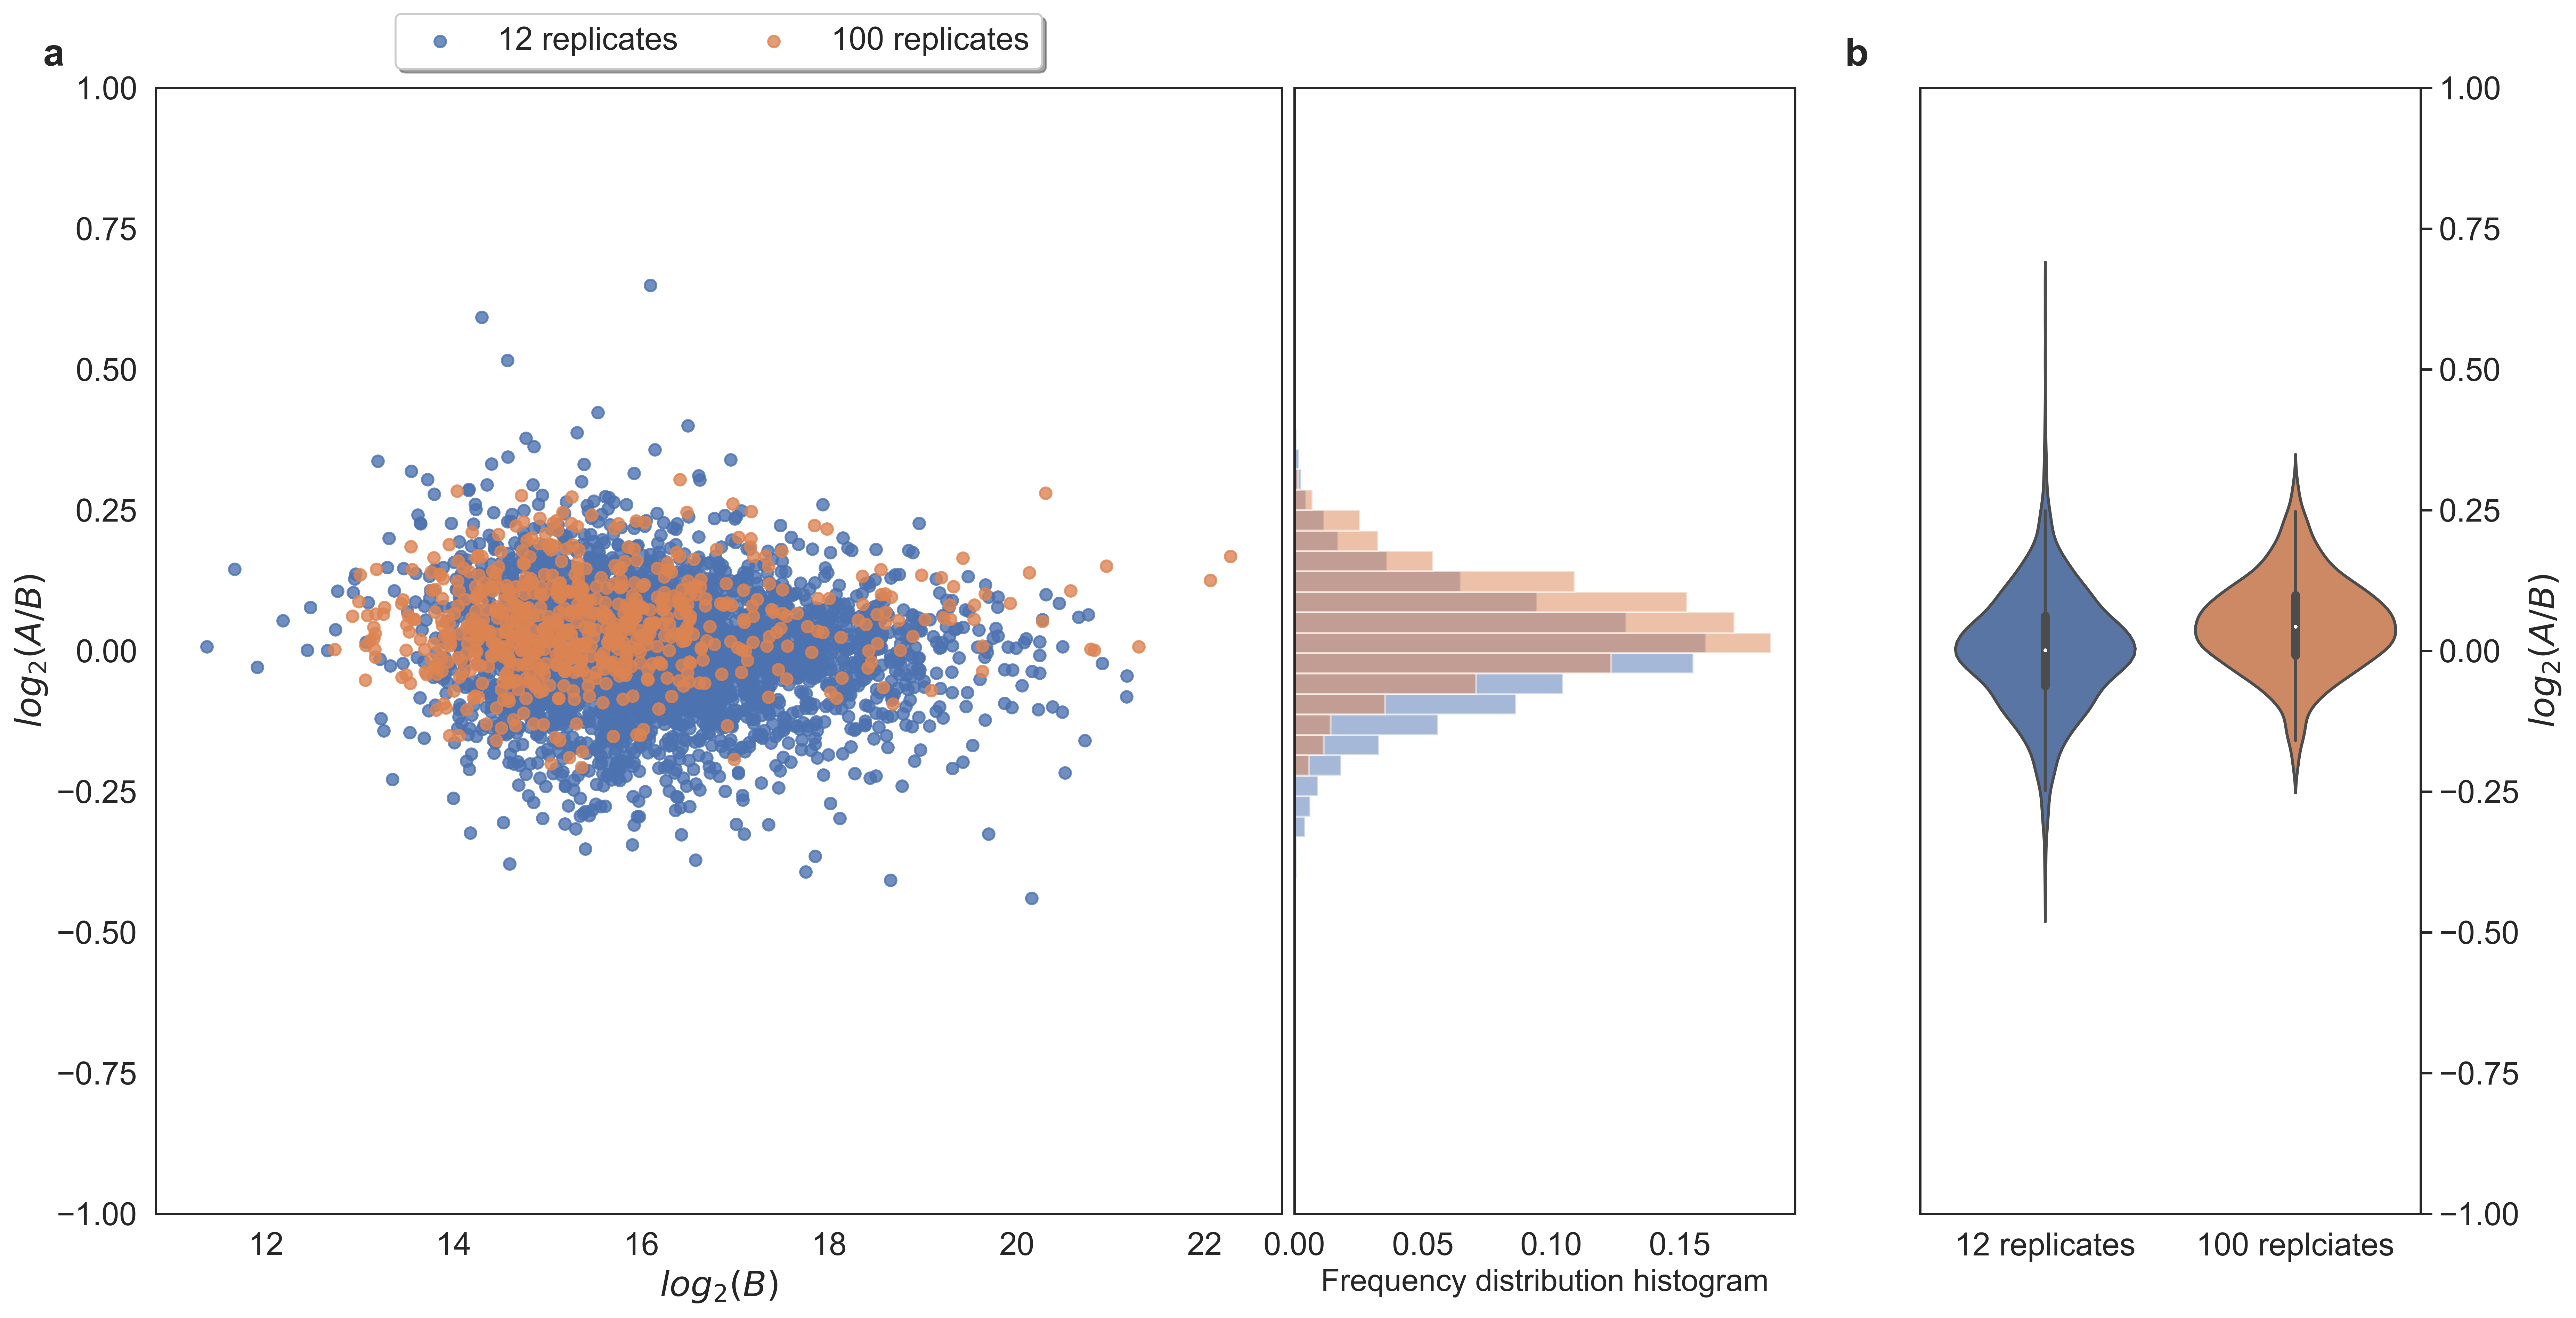

In [46]:
# definitions for the axes
left, width = 0.1, 0.45
bottom, height = 0.1, 0.45
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]


fig = plt.figure(figsize=(18,18),dpi=400)
ax = fig.add_axes(rect_scatter)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
x = temp_12['LogB'].values
y = temp_12['LogRatio'].values
ax.scatter(x,y,alpha=0.8,label='12 replicates')

counts,bins = np.histogram(y,bins=30)
counts = counts/np.sum(counts)
percent_12 = ax_histy.hist(bins[:-1], bins, weights=counts,orientation='horizontal',alpha=0.5)

x = temp_100['LogB'].values
y = temp_100['LogRatio'].values
ax.scatter(x,y,alpha=0.8,label='100 replicates')
counts,bins = np.histogram(y,bins=bins)
counts = counts/np.sum(counts)
percent_100 = ax_histy.hist(bins[:-1], bins, weights=counts,orientation='horizontal',alpha=0.5)
ax_histy.set_xlabel('Frequency distribution histogram',fontsize=16)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),fancybox=True, shadow=True, ncol=2)
ax.set_ylim(-1,1)
ax.set_xlabel("$log_2(B)$",fontsize=18)
ax.set_ylabel("$log_2(A/B)$",fontsize=18)


rect_new = [left + width + spacing + 0.25, bottom, 0.2, height]
ax2 = fig.add_axes(rect_new)

data_df = pd.DataFrame([temp_12['LogRatio'].values,temp_100['LogRatio'].values]).T
data_df.columns = ['12 replicates','100 replciates']


#ax2.spines['left'].set_visible(False)
#ax2.spines['top'].set_visible(False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2 = sns.violinplot(data=data_df)
# ax[1].set_title('b)', {'fontsize':15},loc='left')
# ax2.set_xlabel("$log_2(A/B)$",fontsize=20)
ax2.set_ylabel("$log_2(A/B)$",fontsize=18)
ax2.set_ylim((-1,1))

#ax2.set_xticks([new_ticks,],fontsize=20)

ax.text(-0.1, 1.02, 'a', transform=ax.transAxes, size=20, weight='bold')
ax2.text(1.5, 1.02, 'b', transform=ax.transAxes, size=20, weight='bold')
plt.savefig('fig7.jpg',orientation='landscape',dpi=400,bbox_inches='tight')

In [47]:
np.median(temp_12['LogRatio'].values)

0.0011737476178952358

In [48]:
np.median(temp_100['LogRatio'].values)

0.042977367294391514

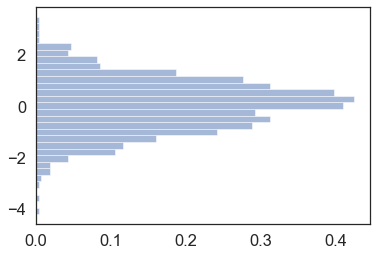

In [49]:
y = np.random.randn(1000)
test = plt.hist(y, bins=30, density=True,orientation='horizontal',alpha=0.5)

In [50]:
counts,bins = np.histogram(y,bins=30)
counts = counts/np.sum(counts)

In [51]:
bins[:-1]

array([-4.20797468, -3.95147447, -3.69497427, -3.43847406, -3.18197386,
       -2.92547366, -2.66897345, -2.41247325, -2.15597304, -1.89947284,
       -1.64297264, -1.38647243, -1.12997223, -0.87347203, -0.61697182,
       -0.36047162, -0.10397141,  0.15252879,  0.40902899,  0.6655292 ,
        0.9220294 ,  1.17852961,  1.43502981,  1.69153001,  1.94803022,
        2.20453042,  2.46103062,  2.71753083,  2.97403103,  3.23053124])

(array([0.001, 0.   , 0.001, 0.   , 0.001, 0.002, 0.005, 0.005, 0.011,
        0.027, 0.03 , 0.041, 0.062, 0.074, 0.08 , 0.075, 0.105, 0.109,
        0.102, 0.08 , 0.071, 0.048, 0.022, 0.021, 0.011, 0.012, 0.001,
        0.001, 0.001, 0.001]),
 array([-4.20797468, -3.95147447, -3.69497427, -3.43847406, -3.18197386,
        -2.92547366, -2.66897345, -2.41247325, -2.15597304, -1.89947284,
        -1.64297264, -1.38647243, -1.12997223, -0.87347203, -0.61697182,
        -0.36047162, -0.10397141,  0.15252879,  0.40902899,  0.6655292 ,
         0.9220294 ,  1.17852961,  1.43502981,  1.69153001,  1.94803022,
         2.20453042,  2.46103062,  2.71753083,  2.97403103,  3.23053124,
         3.48703144]),
 <BarContainer object of 30 artists>)

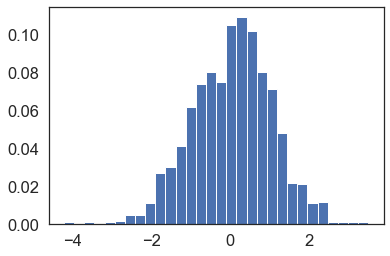

In [52]:
plt.hist(bins[:-1], bins, weights=counts)